In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


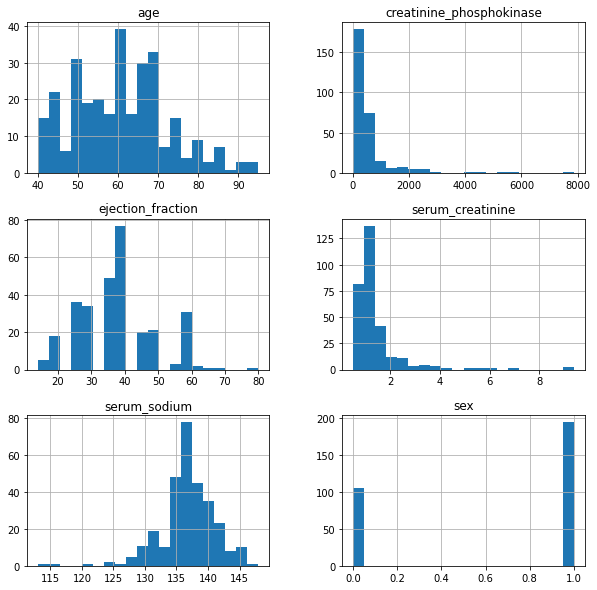

In [ ]:
import matplotlib.pyplot as plt
df[['age','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium','sex']].hist(bins=20,figsize=(10,10))
plt.show()

In [ ]:
df.shape

(299, 13)

In [ ]:
df['sex1']=df['sex'].replace({1:'Male',0:'Female'})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex1
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female


In [ ]:
df['death']=df['DEATH_EVENT'].replace({1:'Yes',0:'No'})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex1,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,Yes
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,Yes
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,Yes
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,Yes
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female,Yes


In [ ]:
#Checking with respect to death
y=df.groupby('death')['age',"creatinine_phosphokinase", "ejection_fraction","platelets", "serum_creatinine","serum_sodium", "time"].agg([np.mean,np.median])
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


age        creatinine_phosphokinase  ... serum_sodium        time       
            mean median                     mean  ...       median        mean median
death                                             ...                                
No     58.761906   60.0               540.054187  ...        137.0  158.339901  172.0
Yes    65.215281   65.0               670.197917  ...        135.5   70.885417   44.5

[2 rows x 14 columns]

In [ ]:
#Checking few stats with respect to High_BP
df.groupby(['sex1','high_blood_pressure','death']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

death                             No       Yes
sex1   high_blood_pressure                    
Female 0                    0.721311  0.278689
       1                    0.613636  0.386364
Male   0                    0.699248  0.300752
       1                    0.639344  0.360656

In [ ]:
df.groupby(['sex1','high_blood_pressure','death']).size().unstack().head()

death                       No  Yes
sex1   high_blood_pressure         
Female 0                    44   17
       1                    27   17
Male   0                    93   40
       1                    39   22

In [ ]:
#Gender to death ratio
x=pd.crosstab(df['sex1'],df['death'])
x.apply(lambda x:x/x.sum(),axis=1)


death,No,Yes
sex1,,
Female,0.676190,0.323810
Male,0.680412,0.319588


In [ ]:
#Smoking to death ratio
a=pd.crosstab(df['death'],df['smoking'])
a.apply(lambda x:x/x.sum(),axis=1)

smoking,0,1
death,,
No,0.674877,0.325123
Yes,0.687500,0.312500


In [ ]:
#Diabetes to Death ratio
b=pd.crosstab(df['diabetes'],df['death'])
b.apply(lambda x:x/x.sum(),axis=1)

death,No,Yes
diabetes,,
0,0.678161,0.321839
1,0.680000,0.320000


In [ ]:
#Anaemia to Death ratio
c=pd.crosstab(df['anaemia'],df['death'])
c.apply(lambda x:x/x.sum(),axis=1)

death,No,Yes
anaemia,,
0,0.705882,0.294118
1,0.643411,0.356589


In [ ]:
df=df.drop(columns=['sex1','death'])

In [ ]:
df.shape

(299, 13)

In [ ]:
df=df.dropna()


In [ ]:
df = df.drop(columns=['anaemia', 'diabetes', 'sex', 'smoking', 'creatinine_phosphokinase'])

In [ ]:
df.head()

,age,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1,265000.00,1.9,130,4,1
1,55.0,38,0,263358.03,1.1,136,6,1
2,65.0,20,0,162000.00,1.3,129,7,1
3,50.0,20,0,210000.00,1.9,137,7,1
4,65.0,20,0,327000.00,2.7,116,8,1


In [ ]:
df2 = df
y=df2['DEATH_EVENT']
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [ ]:
X=df2.drop(columns=['DEATH_EVENT'])
X

,age,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time
0,75.0,20,1,265000.00,1.9,130,4
1,55.0,38,0,263358.03,1.1,136,6
2,65.0,20,0,162000.00,1.3,129,7
3,50.0,20,0,210000.00,1.9,137,7
4,65.0,20,0,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,38,1,155000.00,1.1,143,270
295,55.0,38,0,270000.00,1.2,139,271
296,45.0,60,0,742000.00,0.8,138,278
297,45.0,38,0,140000.00,1.4,140,280


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
clf_tree = DecisionTreeClassifier(random_state=21, max_depth = 7, max_leaf_nodes=6).fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]
